In [1]:
from sklearn.model_selection import train_test_split #数据划分
from sklearn.linear_model import LinearRegression #线性回归
from sklearn.preprocessing import StandardScaler #数据标准化
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import time

In [2]:
#设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [12]:
#加载数据
#日期，时间，有功功率，无功功率，电压，电流，厨房用电功率，洗衣机用电功率等
path1='./household_power_consumption_1000.txt'
#没有混合类型的时候可以通过low_memory=F来调用更多内存
df=pd.read_csv(path1,sep=';',low_memory=False)

In [13]:
#不赋值，默认获取5行数据
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [8]:
#查看格式信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Date                     1000 non-null object
Time                     1000 non-null object
Global_active_power      1000 non-null float64
Global_reactive_power    1000 non-null float64
Voltage                  1000 non-null float64
Global_intensity         1000 non-null float64
Sub_metering_1           1000 non-null float64
Sub_metering_2           1000 non-null float64
Sub_metering_3           1000 non-null float64
dtypes: float64(7), object(2)
memory usage: 70.4+ KB


In [15]:
#异常数据处理（异常数据过滤）
new_df=df.replace('?',np.nan) #替换非法字符np.nan
datas=new_df.dropna(axis=0,how='any') #只要有一个数据为空，就进行删除操作
datas.describe().T #观察数据的多种统计指标（只能看数值型的）

,count,mean,std,min,25%,50%,75%,max
Global_active_power,1000.0,2.418772,1.239979,0.206,1.806,2.414,3.308,7.706
Global_reactive_power,1000.0,0.089232,0.088088,0.000,0.000,0.072,0.126,0.528
Voltage,1000.0,240.035790,4.084420,230.980,236.940,240.650,243.295,249.370
Global_intensity,1000.0,10.351000,5.122214,0.800,8.400,10.000,14.000,33.200
Sub_metering_1,1000.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000
Sub_metering_2,1000.0,2.749000,8.104053,0.000,0.000,0.000,1.000,38.000
Sub_metering_3,1000.0,5.756000,8.066941,0.000,0.000,0.000,17.000,19.000


In [14]:
#查看格式信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Date                     1000 non-null object
Time                     1000 non-null object
Global_active_power      1000 non-null float64
Global_reactive_power    1000 non-null float64
Voltage                  1000 non-null float64
Global_intensity         1000 non-null float64
Sub_metering_1           1000 non-null float64
Sub_metering_2           1000 non-null float64
Sub_metering_3           1000 non-null float64
dtypes: float64(7), object(2)
memory usage: 70.4+ KB


In [7]:
#创建一个时间函数格式化字符串
def date_format(dt):
    #dt显示是一个series/tuple  dt[0]是date  dt[1]是time
    t=time.strptime(' '.join(dt),'%d/%m/%Y %H:%M:%S')
    return (t.tm_year,t.tm_mon,t.tm_mday,t.tm_hour,t.tm_min,t.tm_sec)

#需求：构建时间和功率之间的映射关系，可以认为，特征属性为时间，目标属性为功率值
#获取x和y变量，并将时间转换成数值型连续变量
X=datas.iloc[:,0:2]
# print(X)
#apply对DataFrame中的数据采用给定的函数进行处理，具体是行数据还是列数据，看参数
#如果axis为1，那么表示按行进行数据处理   如果axis为0，表示按照列进行数据处理

X=X.apply(lambda x:pd.Series(date_format(x)),axis=1)
# print(X.dtype)
# Y是功率
Y=datas['Global_active_power']
# print(Y)

In [8]:
X.head(2)


,0,1,2,3,4,5
0,2006,12,16,17,24,0
1,2006,12,16,17,25,0


In [9]:
## 对数据集进行测试集和训练集的划分
# X:特征矩阵（类型一般是DataFrame）
# Y:特征对应的label标签（类型一般是Series）
# test_size:对X/Y进行划分的时候，测试集的数据占比，是一个(0,1)之间的float类型的值
# random_state:数据分割是基于随机器的分割，该参数给定随机种子，给一个值得作用就是保证每次分割
# 所产生的数据集是完全相同的
#
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)




In [22]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)

(800, 6)
(200, 6)
(800,)


In [23]:
#查看训练集上的数据信息
X_train.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [26]:
#数据标准化
#StandardScaler 将数据转换为标准差为1的数据集（有一个数据的映射）
#scikit-learn中，如果一个API名字有fit,那么就有模型训练的含义，默认是没有返回值
#scikit-learn中，如果一个API名字中有tranform，那么就表示对数据具有转换的含义操作
#scikit-learn中，如果如果一个API名字中有predict,那么久表示进行数据预测，会有一个预测结果输出
#scikit-learn中，如果一个API名字中既有fit又有tranform的情况下，那就是两者的结合（先做fit 再做transform）

ss=StandardScaler() #模型对象创建
#ss.fit(X_train) #模型训练
# X_train=xx.transform(X_train) #对训练模型并转换训练集
X_train=ss.fit_transform(X_train) #训练模型并转换训练集
X_test=ss.transform(X_test) #直接使用在模型构建数据上进行一个数据标准化操作（测试集）



E:\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


In [25]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5
count,800.0,800.0,8.000000e+02,8.000000e+02,8.000000e+02,800.0
mean,0.0,0.0,3.258505e-16,-6.161738e-17,2.470246e-17,0.0
std,0.0,0.0,1.000626e+00,1.000626e+00,1.000626e+00,0.0
min,0.0,0.0,-1.221561e+00,-1.333814e+00,-1.722545e+00,0.0
25%,0.0,0.0,-1.221561e+00,-8.377420e-01,-8.532677e-01,0.0
50%,0.0,0.0,8.186245e-01,-3.416698e-01,1.600918e-02,0.0
75%,0.0,0.0,8.186245e-01,1.022529e+00,8.852861e-01,0.0
max,0.0,0.0,8.186245e-01,1.518601e+00,1.696611e+00,0.0


In [18]:
#模型训练
lr=LinearRegression(fit_intercept=True)
lr.fit(X_train,Y_train) #用训练集训练模型
#模型校验
y_predict=lr.predict(X_test) #用测试集预测结果

#评估模型
print('训练集上R2',lr.score(X_train,Y_train))
print('测试集上R2',lr.score(X_test,Y_test))
mse=np.average((y_predict-Y_test)**2)
rmse=np.sqrt(mse)
print('rmse:',rmse)







训练集上R2 0.24409311805909073
测试集上R2 0.1255162851373598
rmse: 1.164092345973624


In [19]:
#输出模型训练得到相关参数
print("模型的系数(θ):", end="")
print(lr.coef_)
print('模型的截距:',end='')
print(lr.intercept_)


模型的系数(θ):[ 0.00000000e+00 -1.72084569e-15 -2.88866162e+00 -1.15951092e-01
 -5.91923983e-03  0.00000000e+00]
模型的截距:51.81660553305287


In [27]:
#模型保存/持久化
#在机器学习部署的时候，实际上其中一种方式就是将模型进行输出；另外一种方式就是
#直接将预测结果输出
#模型输出一般是将模型输出到磁盘文件
from sklearn.externals import joblib
#保存模型要求给定的文件所在的文件夹比较存在
joblib.dump(ss,'./data_ss.model')
joblib.dump(lr,'./data_lr.model')









['./data_lr.model']

In [28]:
#加载模型
ss3=joblib.load('./data_ss.model')
lr3=joblib.load('./data_lr.model')

#使用加载的模型进行预测
data1=[[2006,12,17,12,25,0]]
data1=ss3.transform(data1)
print(data1)
lr3.predict(data1)







[[2006.   12.   17.   12.   25.    0.]]


array([1.16996393])

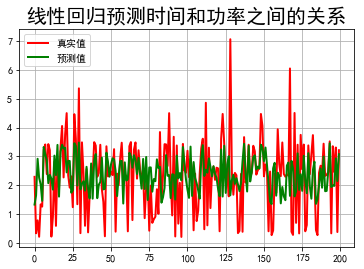

In [29]:
#预测值和实际值画图比较
t=np.arange(len(X_test))
plt.figure(facecolor='w') #建一个画布，facecolor背景颜色
plt.plot(t,Y_test,'r-',linewidth=2,label='真实值')
plt.plot(t,y_predict,'g-',linewidth=2,label='预测值')
plt.legend(loc='upper left') #显示图例，设置图例位置那个曲线解释的位置
plt.title('线性回归预测时间和功率之间的关系',fontsize=20)
plt.grid(b=True)
plt.show()
